## Remove this video, dropout does not really fit here... Video 3: Dropout
Now that we found that we have some trouble with noise and digits I want to introduce a really nice technique to you: dropout. Although I introduce it in a section dedicated to autoencoders it's actually a great method for almost every network that either tends to overfit, or tends to have a problem with noisy input. 

Here is the central idea of a dropout layer: you take a set of neurons as input, and set a percentage of them to zero. The original idea was discussed in [this paper](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf). 

Adding dropout to a neural network looks like this: 
![dropout](illustrations/section2/dropout.jpeg)


Now this sounds like a crazy idea, but there is a great reason to do so. Normally one neuron can encode a very specific input to a very specific output. When you add noise this neuron won't be able to encode this specific input, and thus the output will be wrong. By randomly setting some inputs to zero all neurons are "forced" to encode the same information, because they might just end up being cancelled out. 

Not only does this prevent overfitting (networks learn a more general approach to the problem), it also makes your network more robust to noise. 



### Adding dropout with TensorFlow
Adding dropout with TensorFlow is easy. In the tf.layers part of the TensorFlow library you will [find the function](https://www.tensorflow.org/api_docs/python/tf/layers/dropout). As argument you can specify the fraction of neurons you want to set to zero. You can also set the training boolean. Both setting 

In [9]:

tf.reset_default_graph()
dropout_fraction = 0.3
is_training = tf.placeholder(dtype=tf.bool)
input_placeholder = tf.placeholder(dtype=tf.float32, 
                                   shape=[None, input_dim],
                                  name='inputplaceholder')

fc1 = tf.layers.dense(input_placeholder, 
                      latent_first_size, 
                     activation = tf.nn.relu)
fc1_dropped_out = tf.layers.dropout(fc1, rate=dropout_fraction, training=is_training)

latent_encoded = tf.layers.dense(fc1_dropped_out, 
                                 latent_middle_size, 
                                activation = tf.nn.relu)

decoded_1 = tf.layers.dense(latent_encoded, 
                            latent_first_size,
                           activation = tf.nn.relu)
decoded_1_dropped_out = tf.layers.dropout(decoded_1, 
                              rate=dropout_fraction,
                             training=is_training)

result_decoder = tf.layers.dense(decoded_1_dropped_out, input_dim, activation=tf.nn.sigmoid)

reconstruction_loss = tf.losses.mean_squared_error(input_placeholder, 
                                                   result_decoder)
trainstep = tf.train.AdamOptimizer().minimize(reconstruction_loss)


### Things to keep in mind
Using dropout is a great way to prevent overfitting and making your network more robust. However, keep in mind: 
- You CAN apply dropout on the input in this case
- You CAN NOT apply dropout on the output. The network has no way of coming back from this error...
- You CAN NOT add dropout to every type of layer. Note that it's fine for dense layers and convolutional layers, but some network architectures don't really allow it. Just keep it in mind for the future. 
- You SHOULD set the dropout percentage to zero during inference (no need to add noise in that stage...). This is the reason I made it a placeholder in our graph. 
- You SHOULD train for a longer time with dropout. The good thing about this is that you actually CAN train for a longer time, the downside is that training your network will take a bit longer. 

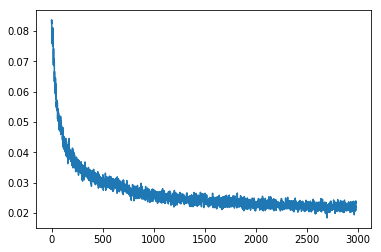

In [10]:

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

iterations = 3000
loss_history = list()
for iteration in range(iterations):
    batch = mnist.train.next_batch(batch_size)
    _, loss = sess.run([trainstep, reconstruction_loss],
                                feed_dict={input_placeholder: batch[0], 
                                          is_training: True})
    loss_history.append(loss)
plt.plot(loss_history[20:])
plt.show()


### Trying our new network
Now what we added dropout we can try our network. Note again that we have to say to the dropout layers that we are not training anymore.  

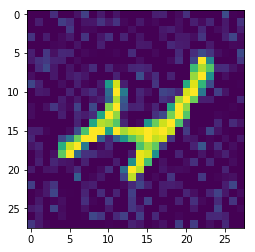

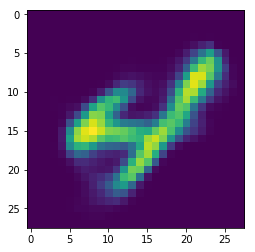

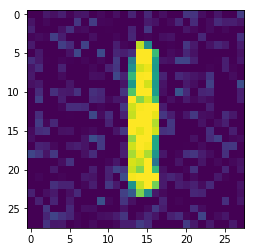

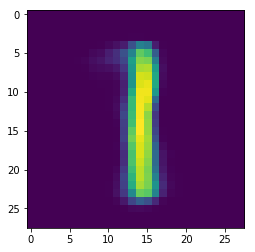

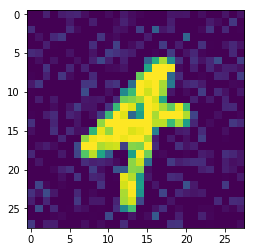

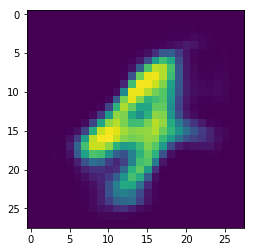

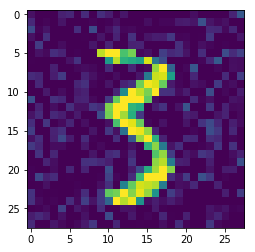

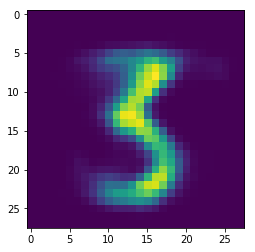

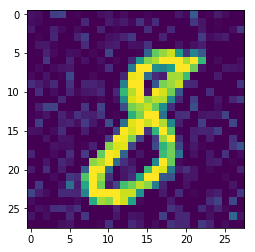

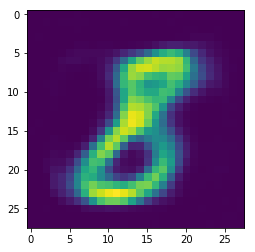

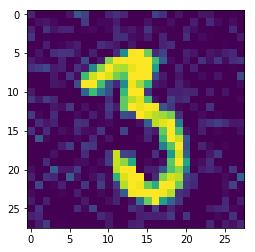

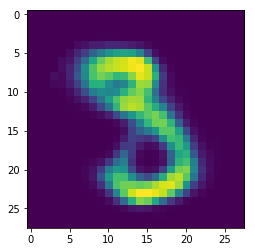

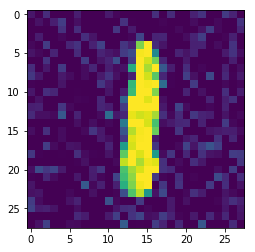

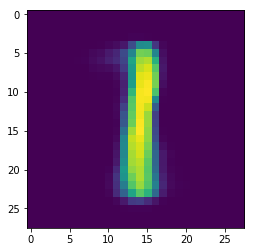

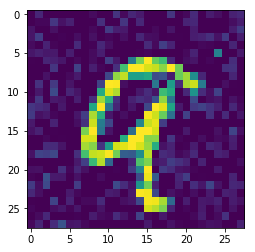

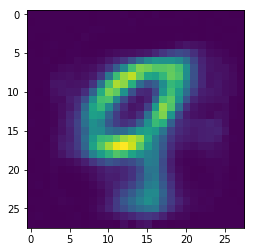

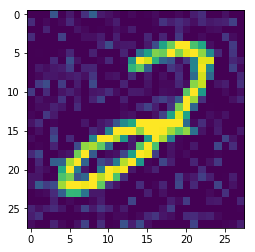

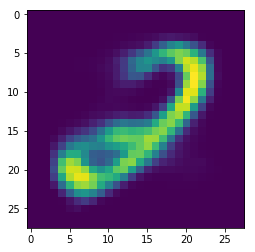

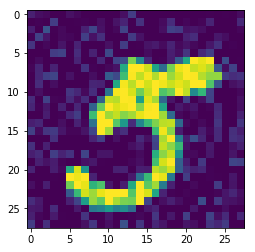

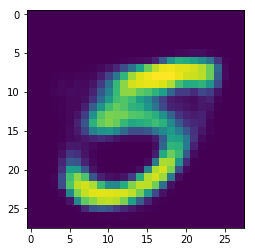

(784,)


In [11]:
  
decoded = sess.run(result_decoder,feed_dict={input_placeholder: noisy_batch,
                                            is_training: False})
for index, digit in enumerate(decoded):
    reshaped = np.reshape(digit, (28,28))
    reshaped = np.clip(reshaped, 0.0, 1.0)
    
    reshaped_original = np.reshape(noisy_batch[index], (28,28))
    plt.imshow(reshaped_original)
    plt.show()
    plt.imshow(reshaped)
    plt.show()
print(noise.shape)